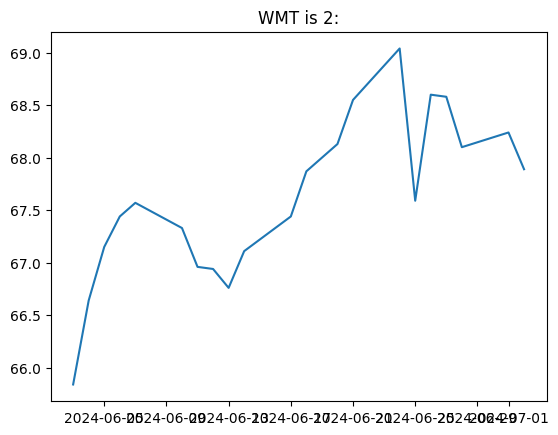

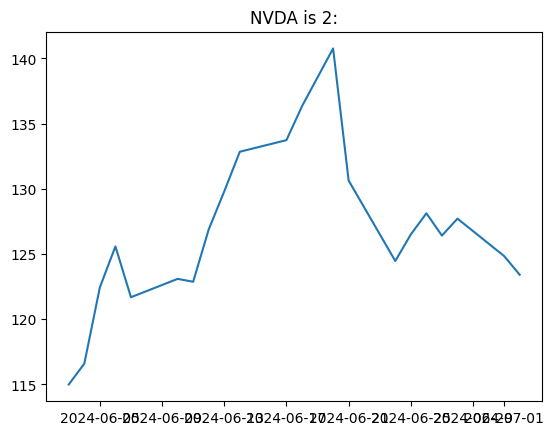

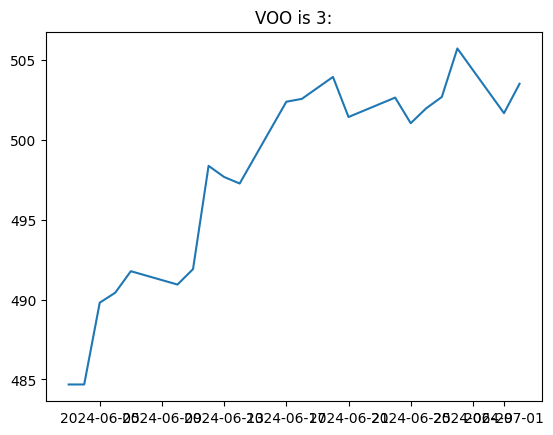

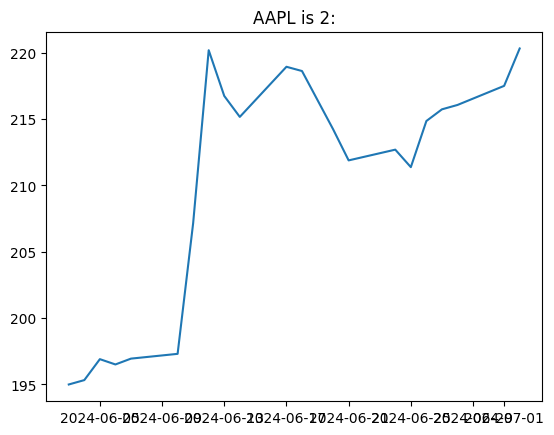

$VW: possibly delisted; No price data found  (period=1mo)
$THE: possibly delisted; No price data found  (period=1mo)


$VW: possibly delisted; No price data found  (period=1mo)
$THE: possibly delisted; No price data found  (period=1mo)


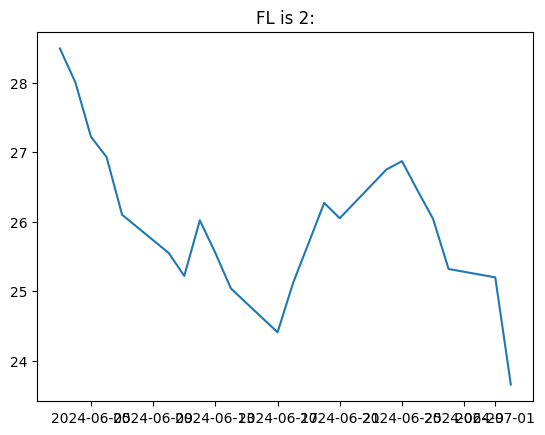

{'Not': 1, 'MSFT': 1, 'WMT': 2, 'NVDA': 2, 'SWEDB': 1, 'SPCE': 1, 'VOO': 3, 'VDADJ': 1, 'VDA': 1, 'FTXU': 1, 'GOOG': 1, 'AAPL': 2, 'DAL': 1, 'VW': 2, 'FDX': 1, 'DLTA': 1, 'The': 2, 'DIS': 1, 'TGT': 1, 'GLU': 1, 'ADBE': 1, 'ORCL': 1, 'I': 1, 'MONZO': 1, 'COST': 1, 'DELL': 1, 'ULTA': 1, 'FL': 2, 'A:': 1, 'SB': 1, 'BID': 1, 'JPM': 1, 'HRA': 1, 'BOE': 1, "I'm": 1, 'AMC': 1, "'N/A'": 1, 'BRK': 1, 'AX': 1, 'ESIAy': 1, 'KLAC': 1, 'AWW': 1, 'OPPN': 1, 'BNRD': 1, 'BA': 1}


In [1]:
#!./bin/python
# pip install yfinance matplotlib jupyterlab
# sudo apt-get install python3-tk (for graphs)
import sys
import sqlite3
import os.path
from datetime import date, timedelta
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

# Check that the required SQLite DB exists and connect, if not, exit the script.
projectZeroDB='projectZeroDB.db'
if not os.path.exists(projectZeroDB):
    sys.exit("Database does not exist, exiting")
else:
    # Connect to DB to pull info to query
    dbConnect = sqlite3.connect(projectZeroDB)
    dbCurser = dbConnect.cursor()

# Loop through last X days of data and pass count of positive stock's stories to dictionary
tickerCount = {}
x = 5
while x >= 0: 
    today = date.today() - timedelta(days=x)
    todayDB = today.isoformat()

    # select tickers from DB for specific date, only extract Positive stocks.
    dbContent = dbCurser.execute('SELECT * FROM projectZeroTickers WHERE date =(?)',(todayDB,))
    for row in dbContent:
        if row[1] == "Positive":
            # save the ticker and count of occurances
            tickerCount.setdefault(row[2], 0)
            tickerCount[row[2]] += 1
        else:
            continue
    x=x-1

# loop through the ticker count dictionary and query stock if there was more than one occurance
for key, value in tickerCount.items():
    if value > 1:
        ytick = yf.Ticker(key)
        try:
            hist = ytick.history(period="1mo")
            # jump to next stock if no history found (e.g. invalid ticker)
            if hist.empty:
                continue
            else:
                # print 1 month stock histroy if returned
                plt.title(label="{} is {}:".format(key, value))
                plt.plot(hist['High'])
                plt.show()
                plt.close()
        except:
            continue


# print ticker count dictionary content for review    
print(tickerCount)

# Close DB connection
dbConnect.close()
